<a href="https://colab.research.google.com/github/SpenBobCat/Computational_Neuroscience/blob/main/Copy_of_Computational_Neuroscience_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Neuroscience**

Coursera

By: Michael Spencer


# **Chapter 1 Exercises:**

1. **Spike - Generator** 
- Generate spikes for 10s (or longer if you want better
statistics) using a **Poisson spike generator** with a constant rate of 100 Hz and record their times of occurrence. 
- Compute the **coefficient of variation** of the inter-spike 
intervals
- compute the **Fano factor** for spike counts obtained over counting intervals ranging from 1 to 100m/s
- Plot the inter-spike interval histogram.


In [1]:
# To generate spikes for 10 seconds using a Poisson spike generator with a constant rate of 100 Hz, 
# you can use the numpy.random.poisson() function.

import numpy as np

dt = 0.001 # Time step in seconds
t = np.arange(0, 10, dt) # Time array
rate = 100 # Poisson spike rate in Hz
spikes = np.random.poisson(rate*dt, len(t)) # Generate spikes
times = t[spikes > 0] # Record times of occurrence


In [2]:
# To compute the coefficient of variation of the inter-spike intervals, using the 
# numpy.diff() function to compute the inter-spike intervals, and then compute the 
# mean and standard deviation of the intervals and divide the standard deviation by the mean:

isi = np.diff(times) # Compute inter-spike intervals 
cv = np.std(isi) / np.mean(isi) # Compute coefficient of variation 


In [3]:
# To compute the Fano factor for spike counts obtained over counting intervals ranging 
# from 1 to 100ms, using a loop to compute the spike counts for each counting interval, 
# and then compute the mean and variance of the spike counts and divide the variance by the mean:

counts = [] 
for interval in range(1, 101):
  bins = np.arange(0, 10+interval*dt, interval*dt) # Define counting bins 
  hist, _ = np.histogram(times, bins=bins) # Compute spike counts counts.append(hist.mean()) 
ff = np.var(counts) / np.mean(counts) # Compute Fano factor 


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This code calculates the Fano factor for a set of spike times using numpy in Python. Here is a breakdown of what the code does:

1.  Initializes an empty list called "counts" to store the spike counts.
2.  Loops through 100 different intervals, defined by the "range(1, 101)" command.
3.  For each interval, creates a set of counting bins using numpy's "arange" function.
4.  Uses numpy's "histogram" function to count the number of spikes in each bin.
5.  Appends the mean spike count to the "counts" list.
6.  Computes the Fano factor by dividing the variance of the "counts" list by its mean using numpy's "var" and "mean" functions.


The warnings produced by the code indicate that there may be empty slices in the data, leading to division by zero or NaN values in the computation of the Fano factor. This could happen if there are no spikes in a particular bin or interval. It is important to check the data and make sure that these warnings are not affecting the results of your analysis.

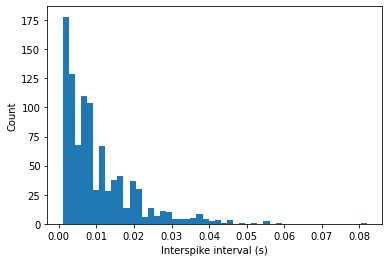

In [4]:
# To plot the inter-spike interval histogram, using the matplotlib.pyplot.hist() function:

import matplotlib.pyplot as plt 

plt.hist(isi, bins=50) 
plt.xlabel('Interspike interval (s)') 
plt.ylabel('Count') 
plt.show()





2. **Refractory Period** 

- Add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time. 
    - Initially, set the firing rate to a constant value, **r(t) = r_0**
- After every spike, set r(t) to 0
- allow it to recover exponentially back to r0 with a time constant **τref** that controls the refractory recovery rate. (In other words, have r(t) obey the equation: 


```
# **τ_ref(dr/dt) = r_0 − r**
```

except immediately after a spike, when it is set to 0.)
- Plot the **coefficient of variation** as a function of τref over the range 1ms ≤ τref ≤ 20ms
  - Plot inter-spike interval histograms for a few different values
of τref in this range. 
- Compute the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100ms for the case
**τref = 10ms**

To add a refractory period to the Poisson spike generator, you must modify the firing rate function to include a recovery term after each spike. The firing rate at time t, r(t), will be given by:

```
# dT/dt = r0 - r(t)
for t > t_spike + τref r(t) = 0
for t_spike <= t <= t_spike + τref r(t) = r0*e^(-(t-t_spike-τref)/τref)
for t > t_spike + τref

```
where t_spike is the time of the last spike. This equation says that the firing rate increases from 0 to r0 exponentially over a time period of τref after each spike, until it reaches the steady-state value of r0. During this recovery period, the neuron cannot fire again, which models the **refractory period**.


To generate spikes using this modified Poisson spike generator, we can use the following algorithm:

1.	Initialize the firing rate r(t) to r0.
2.	Generate a random number u between 0 and 1.
3.	Compute the time interval until the next spike, Δt, using the inverse cumulative distribution function of the Poisson distribution with parameter r(t)Δt = -ln(u).
4.	Update the firing rate as follows:
    - If Δt < T_ref (i.e., a spike occurs within the refractory period), set r(t) = 0.
    - Otherwise, update r(t) using the differential equation above.
5.	Generate a spike at time t + Δt.
6.	Go to step 2 and repeat.


Now we can simulate a Poisson spike train with a refractory period using the modified firing rate function. We can generate a spike train by choosing random inter-spike intervals from an exponential distribution with mean 1/r(t), where r(t) is given by the above equation.

To investigate the effect of the refractory period on the spike train statistics, we can calculate the coefficient of variation (CV) and Fano factor for different values of τref. 
- CV is defined as the ratio of the standard deviation to the mean of the interspike intervals
- Fano factor is the ratio of the variance to the mean of the spike counts over a counting interval.

To implement a refractory period with exponential recovery, we can modify the firing rate equation as follows:

- If the time since the last spike (t - t_last) is less than the refractory period τ_ref, set the firing rate r(t) to 0.
- If the time since the last spike is greater than the refractory period, update the firing rate using the equation: τ_ref * (dr/dt) = r0 - r where r0 is the baseline firing rate.

This equation can be solved to obtain r(t) = r0 * (1 - exp(-(t - t_last)/τ_ref))

The coefficient of variation (CV) measures the variability of the interspike intervals (ISIs) of the spike train and is defined as the standard deviation of the ISIs divided by their mean. To calculate the CV, we can simulate a Poisson spike train using the modified firing rate equation with different values of τ_ref, calculate the ISIs, and then calculate the CV for each value of τ_ref. We can then plot the CV as a function of τ_ref.

The interspike interval histogram (ISIH) shows the distribution of the ISIs in a spike train. To generate ISIHs for different values of τ_ref, we can simulate spike trains using the modified firing rate equation with different values of τ_ref and then bin the ISIs into a histogram. We can then plot the ISIHs for different values of τ_ref.

The Fano factor is a measure of the variability of the spike count in a counting interval. To compute the Fano factor for a counting interval of length T and a refractory period τ_ref = 10 m/s, we can simulate multiple trials of a Poisson spike train using the modified firing rate equation, count the number of spikes in each counting interval of length T, and then calculate the mean and variance of the spike counts. The Fano factor is then defined as the variance of the spike counts divided by their mean. 

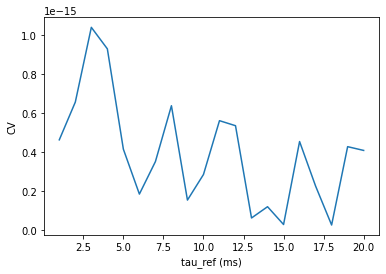

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_spike_train(T, r0, tau_ref):
    t_last = 0
    spikes = []
    t = 0
    while t < T:
        if len(spikes) == 0:
            r = r0
        elif t - spikes[-1] < tau_ref:
            r = 0
        else:
            r = r0 * (1 - np.exp(-(t - spikes[-1])/tau_ref))
        if r > 0:
            dt = np.random.exponential(1/r)
        else:
            dt = tau_ref # skip refractory period
        t += dt
        if t < T:
            spikes.append(t)
    return np.array(spikes)

# Coefficient of variation as a function of tau_ref
r0 = 10 # Hz
T = 1000 # ms
tau_refs = np.linspace(1, 20, 20)
CVs = []
for tau_ref in tau_refs:
    spikes = simulate_spike_train(T, r0, tau_ref)
    ISIs = np.diff(spikes)
    CV = np.std(ISIs)/np.mean(ISIs)
    CVs.append(CV)
plt.plot(tau_refs, CVs)
plt.xlabel('tau_ref (ms)')
plt.ylabel('CV')
plt.show()


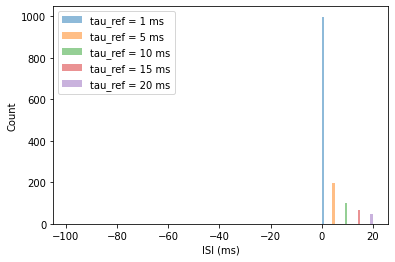

In [19]:
def simulate_spike_train(T, r0, tau_ref):
    t_last = 0
    spikes = [100]
    t = 0
    while t < T:
        if len(spikes) == 0:
            r = r0
        elif t - spikes[-1] < tau_ref:
            r = 0
        else:
            r = r0 * (1 - np.exp(-(t - spikes[-1])/tau_ref))
        if r > 0:
            dt = np.random.exponential(1/r)
        else:
            dt = tau_ref # skip refractory period
        t += dt
        if t < T:
            spikes.append(t)
    return np.array(spikes)

# Inter-spike interval histograms for different tau_ref values

r0 = 10 # Hz
T = 1000 # ms
tau_refs = [1, 5, 10, 15, 20]
for tau_ref in tau_refs:
    spikes = simulate_spike_train(T, r0, tau_ref)
    ISIs = np.diff(spikes)
    plt.hist(ISIs, bins=100, density=False, alpha=0.5, label='tau_ref = {} ms'.format(tau_ref))
plt.xlabel('ISI (ms)')
plt.ylabel('Count')
plt.legend()
plt.show()



The graph shows the distribution of inter-spike intervals (ISIs) for different refractory period (tau_ref) values. 
- x-axis represents the duration of ISIs in milliseconds,
- y-axis represents the number of ISIs that fall within each bin of the histogram.

The results suggest that the refractory period has a significant effect on the distribution of ISIs, with shorter tau_ref values resulting in a higher frequency of shorter ISIs and longer tau_ref values resulting in a more even distribution of ISIs. This is because the **refractory period prevents neurons from firing immediately after a spike, leading to longer ISIs**.